In [1]:
import seaborn as sns

In [2]:
import xgboost as xgb

In [3]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import pandas as pd
data=pd.read_csv("train.csv")
data.head()

c:\users\16063\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,NaN,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,NaN,NaN,...,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,NaN,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,NaN,NaN,...,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,NaN,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4


In [5]:
data=data.drop(['sharepointid','application','country.alpha2','decisiondate','docname','itemid','judgementdate','kpdate','languageisocode','originatingbody_type','parties.0','parties.1','parties.2','respondent.0','respondent.1','respondent.2','respondent.3',
           'respondent.4'],axis=1)

In [6]:
req_res=data['importance']

In [7]:
data.shape[0]

8878

In [8]:
colnames=data.columns
values=data.isna().sum()
values

appno                  0
country.name           0
doctypebranch          0
ecli                   0
introductiondate    8202
                    ... 
ccl_article=p12        0
ccl_article=p4         0
ccl_article=p6         0
ccl_article=p7         0
importance             0
Length: 310, dtype: int64

In [9]:
empty=[]
for i in range(len(colnames)):
    if(values[i]!=0):
        print(colnames[i]+"       "+str(values[i]))
        empty.append(colnames[i])

introductiondate       8202
issue.0       6630
issue.1       7693
issue.10       8857
issue.11       8861
issue.12       8863
issue.13       8866
issue.14       8868
issue.15       8871
issue.16       8874
issue.17       8875
issue.18       8876
issue.19       8876
issue.2       8239
issue.20       8876
issue.21       8876
issue.22       8876
issue.23       8876
issue.24       8877
issue.25       8877
issue.26       8877
issue.3       8508
issue.4       8668
issue.5       8757
issue.6       8801
issue.7       8825
issue.8       8847
issue.9       8853


In [10]:
print(colnames)
print("The number of empty cols:"+str(len(colnames)))

Index(['appno', 'country.name', 'doctypebranch', 'ecli', 'introductiondate',
       'issue.0', 'issue.1', 'issue.10', 'issue.11', 'issue.12',
       ...
       'ccl_article=6', 'ccl_article=7', 'ccl_article=8', 'ccl_article=9',
       'ccl_article=p1', 'ccl_article=p12', 'ccl_article=p4', 'ccl_article=p6',
       'ccl_article=p7', 'importance'],
      dtype='object', length=310)
The number of empty cols:310


In [11]:
data=data.drop(empty,axis=1)

In [12]:
data['ecli']=data['ecli'].iloc[:].str.slice(13,17)

In [13]:
data.head(3)

,appno,country.name,doctypebranch,ecli,originatingbody,originatingbody_name,rank,respondentOrderEng,separateopinion,typedescription,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,Russian Federation,CHAMBER,2009,4,First Section,685.417419,38,False,15,...,0,0,0,0,0,0,0,0,0,4
1,4728/07,Turkey,COMMITTEE,2018,26,Second Section Committee,2641.901855,47,False,15,...,0,0,0,0,0,0,0,0,0,4
2,44135/06,Slovenia,CHAMBER,2012,23,Fith Section,942.213440,43,True,15,...,1,0,0,0,0,0,0,0,0,4


<h2> Exploratory Data Analysis through Visuliazation and Statistics </h2>

<h3>Relationship between Various Variables <h3>

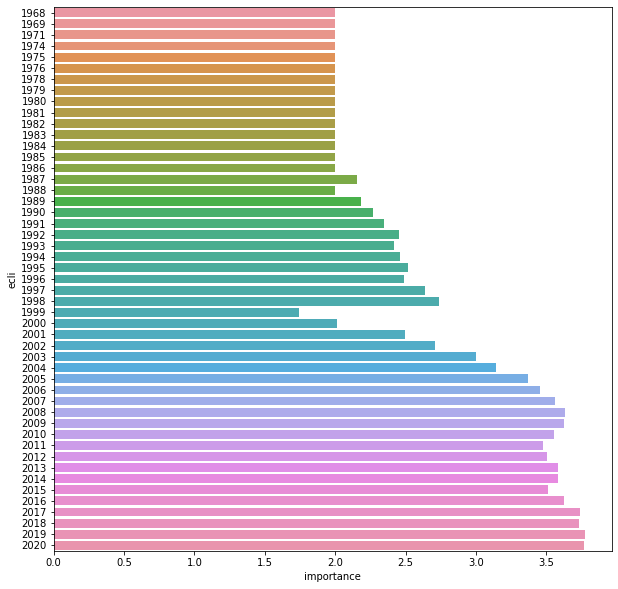

In [14]:
importance_year=data[["ecli","importance"]].groupby(['ecli']).mean()
importance_year=importance_year.reset_index()

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=importance_year,y='ecli',x='importance')
plt.show()

<ipython-input-15-59baff71404a>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


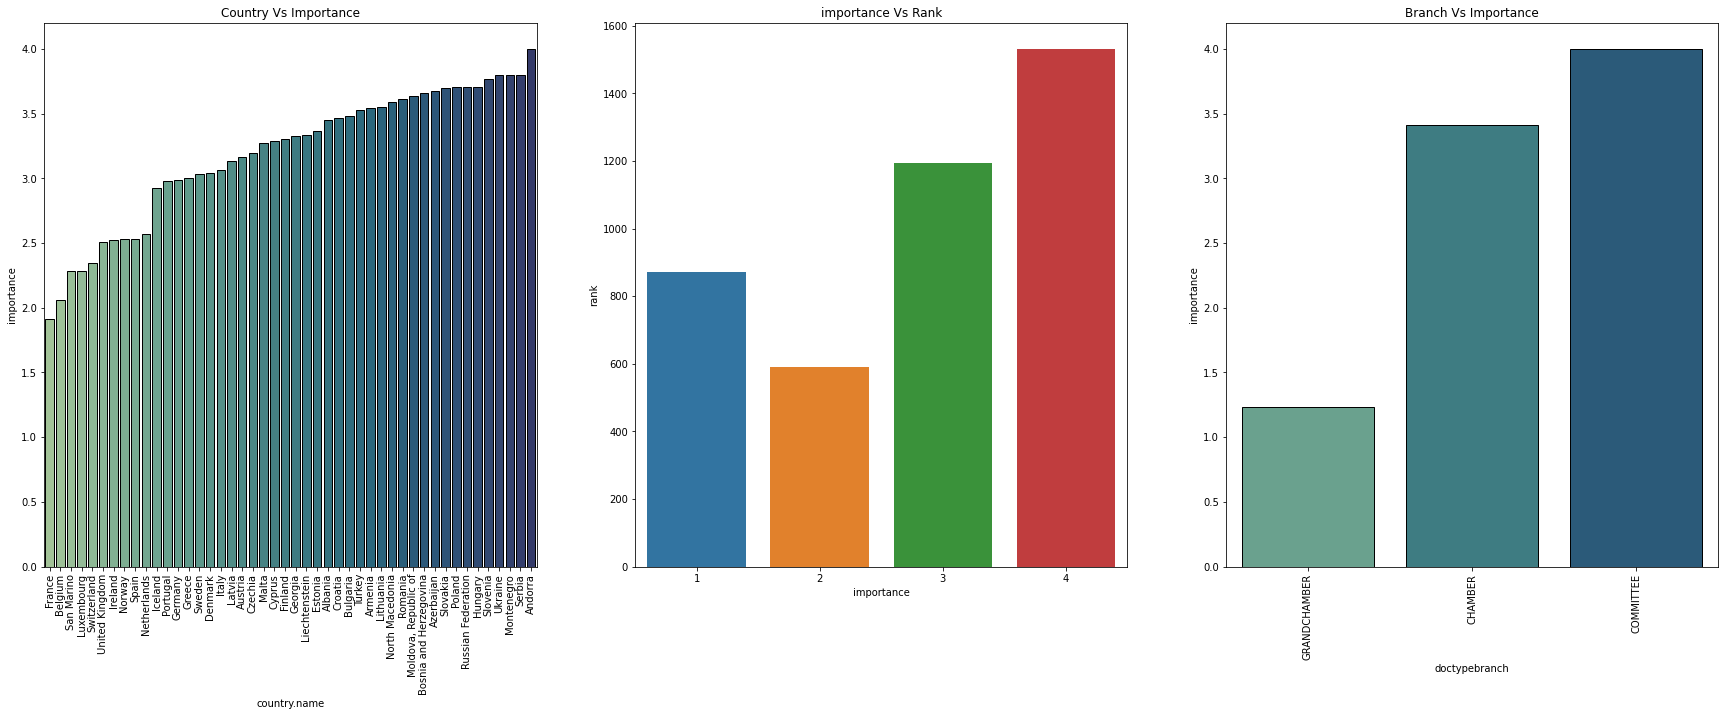

In [15]:
fig, ax =plt.subplots(1,3,figsize=(30,10))
#---------------------------------------------------------------------------------
importance_year=data[["country.name","importance"]].groupby(['country.name']).mean()
importance_year=importance_year.reset_index()
importance_year=importance_year.sort_values(by=['importance'])
c1=sns.barplot(data=importance_year,x='country.name',y='importance',ax=ax[0],palette='crest',edgecolor='black')
c1.set(title='Country Vs Importance')
c1.set_xticklabels(c1.get_xticklabels(), rotation=90)
#-------------------------------------------------------------------------------
importance_rank=data[["rank","importance"]].groupby(["importance"]).mean()
importance_rank=importance_rank.reset_index()
importance_rank=importance_rank.sort_values(by=['rank'])
c2=sns.barplot(data=importance_rank,x='importance',y='rank',ax=ax[1])
c2.set(title="importance Vs Rank")
c2.set_xticklabels(c2.get_xticklabels(), rotation=0)
#-------------------------------------------------------------------------------
importance_branch=data[["doctypebranch","importance"]].groupby(['doctypebranch']).mean()
importance_branch=importance_branch.reset_index()
importance_branch=importance_branch.sort_values(by=['importance'])
c3=sns.barplot(data=importance_branch,x='doctypebranch',y='importance',ax=ax[2],palette='crest',edgecolor='black')
c3.set(title='Branch Vs Importance')
c3.set_xticklabels(c3.get_xticklabels(), rotation=90)
#--------------------------------------------------------------------------------
fig.show()

In [16]:
data.head(3)

,appno,country.name,doctypebranch,ecli,originatingbody,originatingbody_name,rank,respondentOrderEng,separateopinion,typedescription,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,Russian Federation,CHAMBER,2009,4,First Section,685.417419,38,False,15,...,0,0,0,0,0,0,0,0,0,4
1,4728/07,Turkey,COMMITTEE,2018,26,Second Section Committee,2641.901855,47,False,15,...,0,0,0,0,0,0,0,0,0,4
2,44135/06,Slovenia,CHAMBER,2012,23,Fith Section,942.213440,43,True,15,...,1,0,0,0,0,0,0,0,0,4


<ipython-input-17-feba51765f76>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  c3.set_xticklabels(c3.get_xticklabels(), rotation=90)
<ipython-input-17-feba51765f76>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


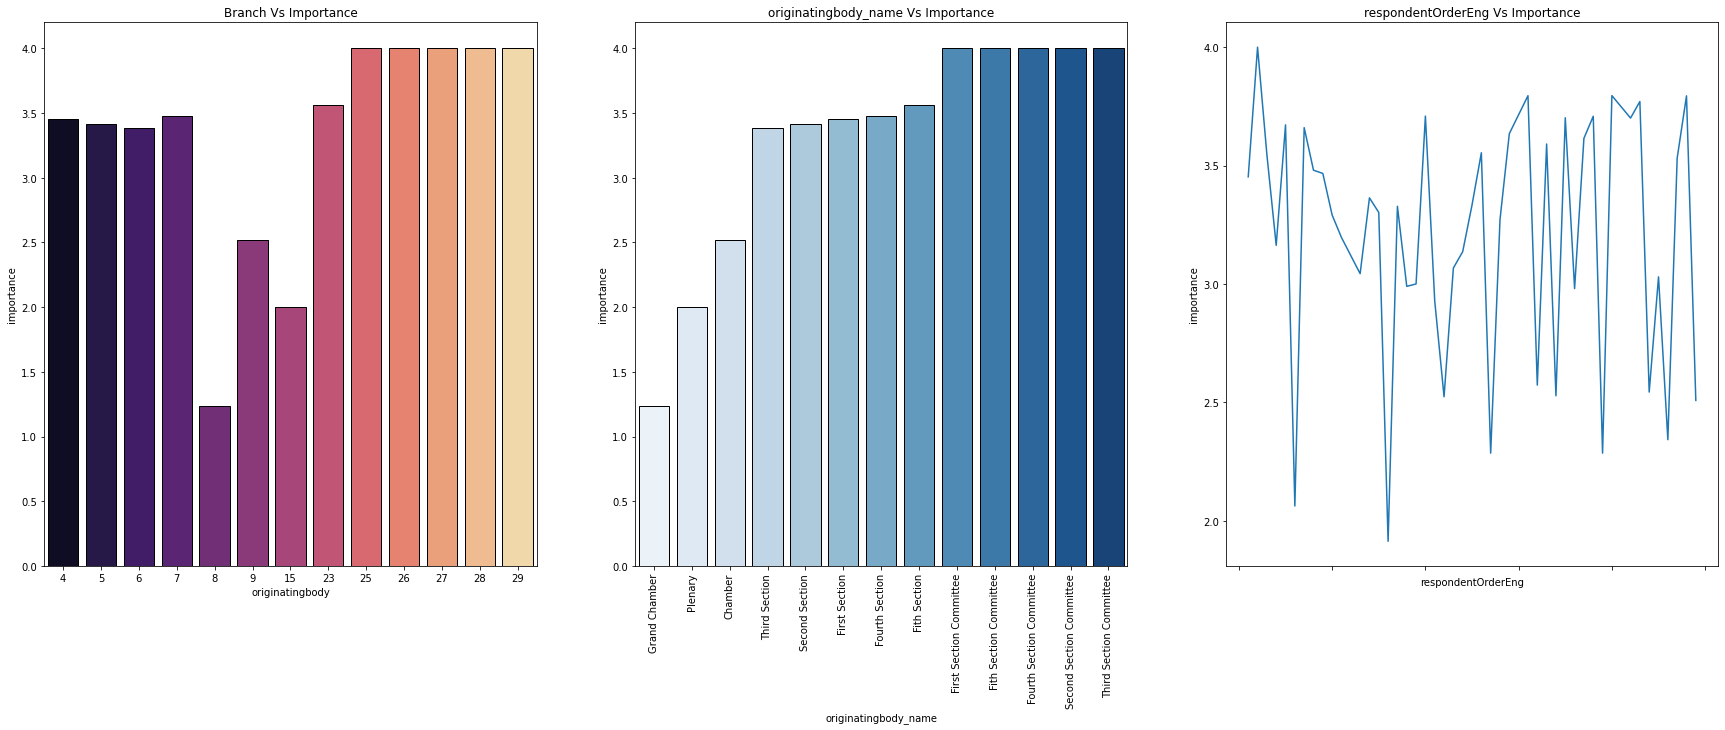

In [17]:
fig, ax =plt.subplots(1,3,figsize=(30,10))
#------------------------------------------------------------------------------
importance_originatingbody=data[["originatingbody","importance"]].groupby(['originatingbody']).mean()
importance_originatingbody=importance_originatingbody.reset_index()
importance_originatingbody=importance_originatingbody.sort_values(by=['importance'])
c1=sns.barplot(data=importance_originatingbody,x='originatingbody',y='importance',ax=ax[0],palette="magma",edgecolor='black')
c1.set(title='Branch Vs Importance')
c1.set_xticklabels(c1.get_xticklabels(), rotation=0)
#--------------------------------------------------------------------------------
importance_originatingbody_name=data[["originatingbody_name","importance"]].groupby(['originatingbody_name']).mean()
importance_originatingbody_name=importance_originatingbody_name.reset_index()
importance_originatingbody_name=importance_originatingbody_name.sort_values(by=['importance'])
c2=sns.barplot(data=importance_originatingbody_name,x='originatingbody_name',y='importance',ax=ax[1],palette="Blues",edgecolor='black')
c2.set(title='originatingbody_name Vs Importance')
c2.set_xticklabels(c2.get_xticklabels(), rotation=90)
#--------------------------------------------------------------------------------
importance_respondentOrderEng=data[["respondentOrderEng","importance"]].groupby(['respondentOrderEng']).mean()
importance_respondentOrderEng=importance_respondentOrderEng.reset_index()
#importance_respondentOrderEng=importance_respondentOrderEng.sort_values(by=['respondentOrderEng'])
c3=sns.lineplot(data=importance_respondentOrderEng, x="respondentOrderEng", y="importance",ax=ax[2])
c3.set(title='respondentOrderEng Vs Importance')
c3.set_xticklabels(c3.get_xticklabels(), rotation=90)
fig.show()

<ipython-input-18-0fbddbc6db8d>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


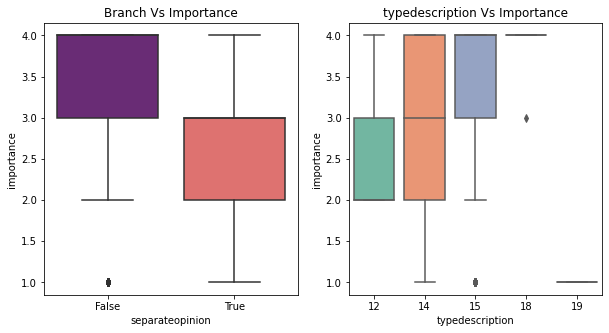

In [18]:
#------------------------------------------------------------
fig, ax =plt.subplots(1,2,figsize=(10,5))
#------------------------------------------------------------
importance_separateopinion=data[["separateopinion","importance"]]
c1=sns.boxplot(data=importance_separateopinion,x='separateopinion',y='importance',ax=ax[0],palette="magma")
c1.set(title='Branch Vs Importance')
c1.set_xticklabels(c1.get_xticklabels(), rotation=0)
#-------------------------------------------------------------
importance_typedescription=data[["typedescription","importance"]]
c2=sns.boxplot(data=importance_typedescription,x='typedescription',y='importance',ax=ax[1],palette="Set2")
c2.set(title='typedescription Vs Importance')
c2.set_xticklabels(c2.get_xticklabels(), rotation=0)
fig.show()

<h1> Data Preprocessing <h1>

In [19]:
data.head(2)

,appno,country.name,doctypebranch,ecli,originatingbody,originatingbody_name,rank,respondentOrderEng,separateopinion,typedescription,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,Russian Federation,CHAMBER,2009,4,First Section,685.417419,38,False,15,...,0,0,0,0,0,0,0,0,0,4
1,4728/07,Turkey,COMMITTEE,2018,26,Second Section Committee,2641.901855,47,False,15,...,0,0,0,0,0,0,0,0,0,4


In [20]:
country=pd.get_dummies(data['country.name'])
branch=pd.get_dummies(data['doctypebranch'])
ecli=pd.get_dummies(data['ecli'])
originatingbody=pd.get_dummies(data['originatingbody_name'])
typedescription=pd.get_dummies(data['typedescription'],prefix='type_')

le = preprocessing.LabelEncoder()

data['doctypebranch']=le.fit_transform(data['doctypebranch'])

data['separateopinion']=le.fit_transform(data['separateopinion'])

ds=pd.concat([country,branch,ecli,originatingbody,typedescription],axis=1)
ds.head(3)

Y_res=data['importance']
new_data=data.drop(['country.name','doctypebranch','ecli','originatingbody_name','typedescription','respondentOrderEng','originatingbody','importance'],axis=1)

new_data.head(3)

new_data=pd.concat([new_data,ds],axis=1)

new_data.head(2)

,appno,rank,separateopinion,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,...,Plenary,Second Section,Second Section Committee,Third Section,Third Section Committee,type__12,type__14,type__15,type__18,type__19
0,2052/08,685.417419,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,4728/07,2641.901855,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [21]:
#new_data.to_csv("AXA.csv")

<h1> Creating and Running on models <h1>

In [22]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(new_data, Y_res, test_size=0.2, random_state=123)

xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 50, alpha = 10, n_estimators = 100)

In [23]:
X_train.head()

,appno,rank,separateopinion,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,...,Plenary,Second Section,Second Section Committee,Third Section,Third Section Committee,type__12,type__14,type__15,type__18,type__19
4000,36024/03,707.047241,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7120,4493/04,609.325989,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3453,45388/99,708.966370,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3628,68011/01,553.819214,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3208,21954/16,6631.344727,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
xg_reg.fit(X_train.drop(['appno'],axis=1),y_train)

c:\users\16063\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:15:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
res=xg_reg.predict(X_test.drop(['appno'],axis=1))

In [26]:
res

array([3, 4, 3, ..., 3, 1, 3], dtype=int64)

In [27]:
y_test

6804    3
6959    4
1033    3
3031    4
3802    4
       ..
2481    4
4431    3
1569    3
4238    1
3792    3
Name: importance, Length: 1776, dtype: int64

In [28]:
xg_reg

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
feat_imp=xg_reg.get_booster().get_score(importance_type= 'gain')

In [30]:
desired=[[i,feat_imp[i]] for i in feat_imp if(feat_imp[i]<0.1)]
desired

[['paragraphs=37-1-a', 0.09015391761875001],
 ['paragraphs=P7-5', 0.019762814025],
 ['paragraphs=46-1', 0.08210992815]]

In [31]:
best_feat=[i[0] for i in desired]
best_feat

['paragraphs=37-1-a', 'paragraphs=P7-5', 'paragraphs=46-1']

<h3> Function to test and do forwards and bacward ellimination <h3>

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
def model_selection(data,y_test,best_features):
    X_train, X_test, y_train, y_test = train_test_split(data, Y_res, test_size=0.2, random_state=123)
    xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 100)
    X_train=X_train.drop(best_features,axis=1)
    X_test=X_test.drop(best_features,axis=1)
    xg_reg.fit(X_train.drop(['appno'],axis=1),y_train)
    res=xg_reg.predict(X_test.drop(['appno'],axis=1),)
    return accuracy_score(y_test, res)

In [50]:
x=(model_selection(new_data,y_test,best_feat))
print("\n\n\nScore is : "+str(x))

c:\users\16063\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:24:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



Score is : 0.8755630630630631


In [34]:
res
appno=new_data['appno']

In [35]:
res

array([3, 4, 3, ..., 3, 1, 3], dtype=int64)

<h3>preprocessing template function<h3>

In [36]:
data=pd.read_csv("test.csv")
data=data.drop(['sharepointid','application','country.alpha2','decisiondate','docname','itemid','judgementdate','kpdate','languageisocode','originatingbody_type','parties.0','parties.1','parties.2','respondent.0','respondent.1','respondent.2','respondent.3',
           'respondent.4'],axis=1)
data=data.drop(empty,axis=1)
data['ecli']=data['ecli'].iloc[:].str.slice(13,17)
country=pd.get_dummies(data['country.name'])
branch=pd.get_dummies(data['doctypebranch'])
ecli=pd.get_dummies(data['ecli'])
originatingbody=pd.get_dummies(data['originatingbody_name'])
typedescription=pd.get_dummies(data['typedescription'],prefix='type_')

le = preprocessing.LabelEncoder()

data['doctypebranch']=le.fit_transform(data['doctypebranch'])

data['separateopinion']=le.fit_transform(data['separateopinion'])

ds=pd.concat([country,branch,ecli,originatingbody,typedescription],axis=1)
ds.head(3)

new_data_2=data.drop(['country.name','doctypebranch','ecli','originatingbody_name','typedescription','respondentOrderEng','originatingbody'],axis=1)

new_data_2.head(3)

new_data_2=pd.concat([new_data_2,ds],axis=1)

new_data_2.head(2)

c:\users\16063\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14,15,16,17,18,19,20,22,23,24,25,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,appno,rank,separateopinion,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,...,Fourth Section Committee,Grand Chamber,Plenary,Second Section,Second Section Committee,Third Section,Third Section Committee,type__12,type__14,type__15
0,1194/04,794.766724,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,53865/11,1448.891235,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 100, alpha = 10, n_estimators = 100)
#new_data['1961']=0
#new_data['1972']=0
#new_data['1970']=0
xg_reg.fit(new_data.drop(['appno','type__18','type__19','1971', '1969', '1974'],axis=1),req_res)

c:\users\16063\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:16:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
my_res=xg_reg.predict(new_data_2.drop(['appno','1970','1972','1961'],axis=1))

In [39]:
my_res

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [40]:
op=pd.DataFrame()
op['appno']=new_data_2['appno']
op['importance']=my_res
op.to_csv("submission.csv",index=False)